In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm,datasets
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from scipy import interp

In [4]:
#导入数据集
iris = datasets.load_iris()
X = iris.data   #(150,4)
y = iris.target #(150,1)

In [56]:
#one_hot向量编码操作
y = label_binarize(y,classes=[0,1,2])
n_classes = y.shape[1]
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [15]:
#添加噪声特征800种
random_state = np.random.RandomState(0)
n_samples,n_features = X.shape
X = np.c_[X,random_state.randn(n_samples,200 * n_features)]#按列左右合并（150,804）

In [17]:
 #划分数据集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .5,random_state = 33)

In [19]:
#构建SVM多元分类器（3分类）
classifier = OneVsRestClassifier(svm.SVC(kernel = 'linear',probability = True,
                                         random_state = random_state))
y_score = classifier.fit(X_train,y_train).decision_function(X_test)


In [38]:
y_test[:,1]

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0])

In [20]:
#计算各个类别的ROC曲线和AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i],tpr[i],_ = roc_curve(y_test[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])

In [21]:
#计算ROC曲线和AUC的微平均
fpr['micro'],tpr['micro'],_ = roc_curve(y_test.ravel(),y_score.ravel())
roc_auc['micro'] = auc(fpr['micro'],tpr['micro'])

##### 画单类别的ROC曲线和AUC

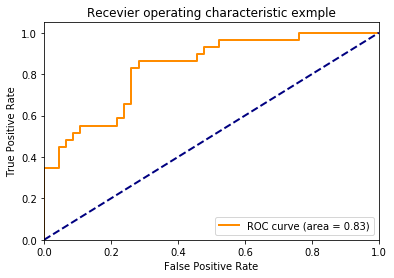

In [55]:
#绘制类别2ROC 曲线
plt.figure()
plt.plot(fpr[2], tpr[2], color='darkorange',
        lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0,1],[0,1],color = 'navy',lw = 2,linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Recevier operating characteristic exmple')
plt.legend(loc = 'lower right')
plt.show()

###### 画多类别的ROC曲线和AUC

In [44]:
#计算ROC和AUC的宏平均,微平均?????

#聚合所有false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))


In [48]:
#?????为什么要插值
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += mean_tpr + interp(all_fpr,fpr[i],tpr[i])

In [49]:
#计算均值和AUC
mean_tpr /= n_classes
fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'],tpr['macro'])

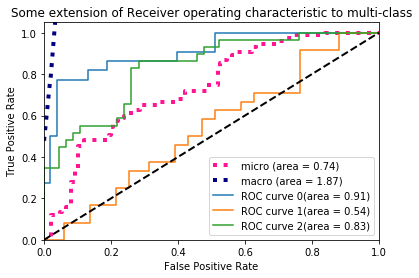

In [54]:
#绘制所有类别ROC曲线
plt.figure()
plt.plot(fpr['micro'],tpr['micro'],label = 'micro (area = {0:.2f})'.format(roc_auc['micro']),
        color = 'deeppink',linestyle = ':',lw = 4)
plt.plot(fpr['macro'],tpr['macro'],label = 'macro (area = {0:.2f})'.format(roc_auc['macro']),
        color = 'navy',linestyle = ':',lw = 4)
colors = cycle(['aque','darkorange','cornflowerblue'])#元素循环使用

for i ,color in zip(range(n_classes),colors):
    plt.plot(fpr[i],tpr[i],label = 'ROC curve {0}(area = {1:.2f})'.format(i,roc_auc[i]))

plt.plot([0,1],[0,1],'k--',lw = 2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

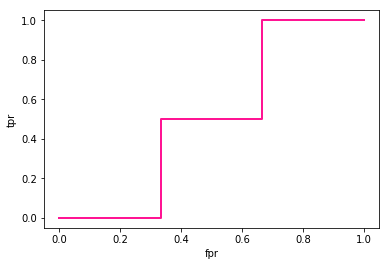

In [69]:
#简单测试
y = np.array([1,2,3,2,1])
score = np.array([0.2,0.4,0.6,0.7,1])
fpr,tpr,_ = roc_curve(y,score,pos_label=2)#Pos_label:将哪个lable定义为正类

plt.plot(fpr,tpr,lw = 2,color = 'deeppink')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()